<a href="https://colab.research.google.com/github/andersonfs94/Identificador_Fake_News/blob/main/Machine_Learning_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Carregar os datasets de notícias verdadeiras e falsas
dados_true = pd.read_csv('/content/drive/MyDrive/Dataset/True.csv')
dados_fake = pd.read_csv('/content/drive/MyDrive/Dataset/Fake.csv')

In [ ]:
# Descrever os dados para entender a distribuição
dados_true.describe()

In [ ]:
# Descrever os dados para entender a distribuição
dados_fake.describe()

In [ ]:
# Adicionar uma coluna de label aos datasets
dados_true['label'] = ['Real']*len(dados_true)
dados_fake['label'] = ['Fake']*len(dados_fake)

# Concatenar os datasets em um único dataframe e embaralhar os dados
dados = dados_true.append(dados_fake).sample(frac=1).reset_index().drop(columns=['index']) #Reinicia o índice

In [ ]:
# Visualizar as primeiras linhas do dataset unificado
dados.head()

In [ ]:
# Verificar a forma do DataFrame
dados.shape

In [ ]:
# Separar as labels (rótulos)
rotulo = dados.label
rotulo.head()

In [ ]:
#Dividindo os dados em treino e teste. Sendo a variável x o texto dos dados e a variável y o rotulo com as informações de verdadeiro/falso.
#Como é um aprendizado supervisionado, é necessário ter a resposta nos dados.
x_train,x_test,y_train,y_test=train_test_split(dados['text'], rotulo, test_size=0.3, random_state=7)

# Passive Aggressive Classifier

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

In [ ]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Precisão do Passive Aggressive Classifier: {round(score*100,2)}%')

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred, labels=['Fake','True'])

In [ ]:
cf_matrix

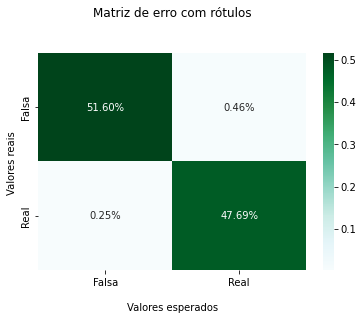

In [ ]:
#Matriz de Erro
import seaborn as sns
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='BuGn')

ax.set_title('Matriz de erro com rótulos\n\n')
ax.set_xlabel('\nValores esperados')
ax.set_ylabel('Valores reais ')

ax.xaxis.set_ticklabels(['Falsa','Real'])
ax.yaxis.set_ticklabels(['Falsa','Real'])

plt.show()